## ДЗ №4. Визуальный анализ данных (Автор: Дащенко А.)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format ='{:20,.2f}'.format

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

## Задание 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

### 1.1. Скачать следующие данные: kc-house-data и laptop_price ???

In [37]:
df = pd.read_csv('kc-house-data.csv', encoding='latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### 1.2. Изучите стоимости недвижимости

In [38]:
df.price.nunique()

4028

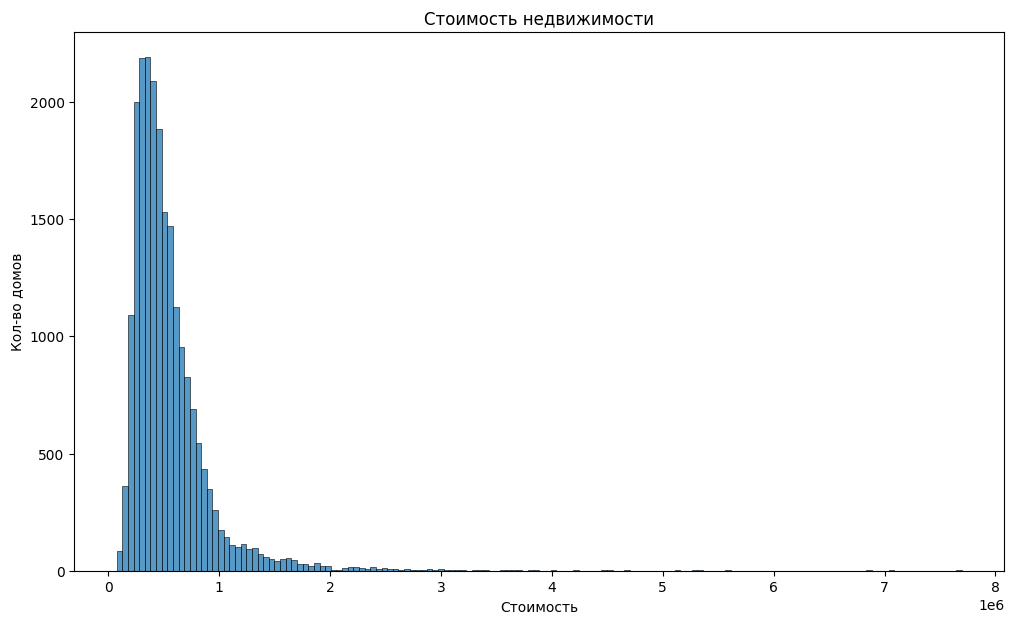

In [39]:
sns.histplot(df['price'], bins=150)
plt.xlabel('Стоимость')
plt.ylabel('Кол-во домов')
plt.title('Стоимость недвижимости');

### 1.3. Изучите распределение квадратуры жилой

In [40]:
df.sqft_living.nunique()

1038

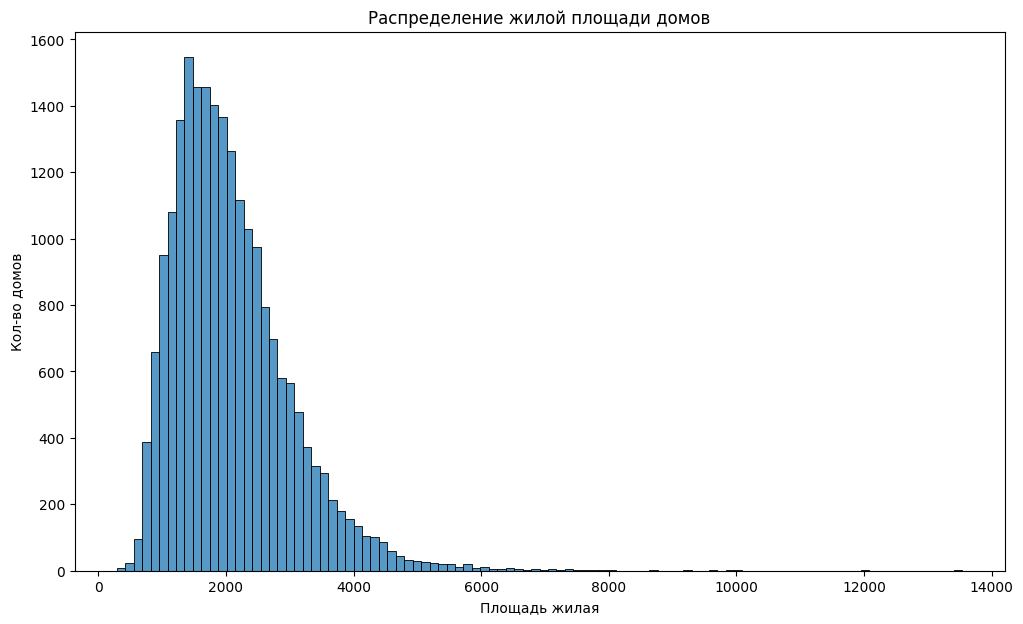

In [41]:
sns.histplot(df['sqft_living'], bins=100)
plt.xlabel('Площадь жилая')
plt.ylabel('Кол-во домов')
plt.title('Распределение жилой площади домов');

### 1.4. Изучите распределение года постройки

In [42]:
df.yr_built.nunique()

116

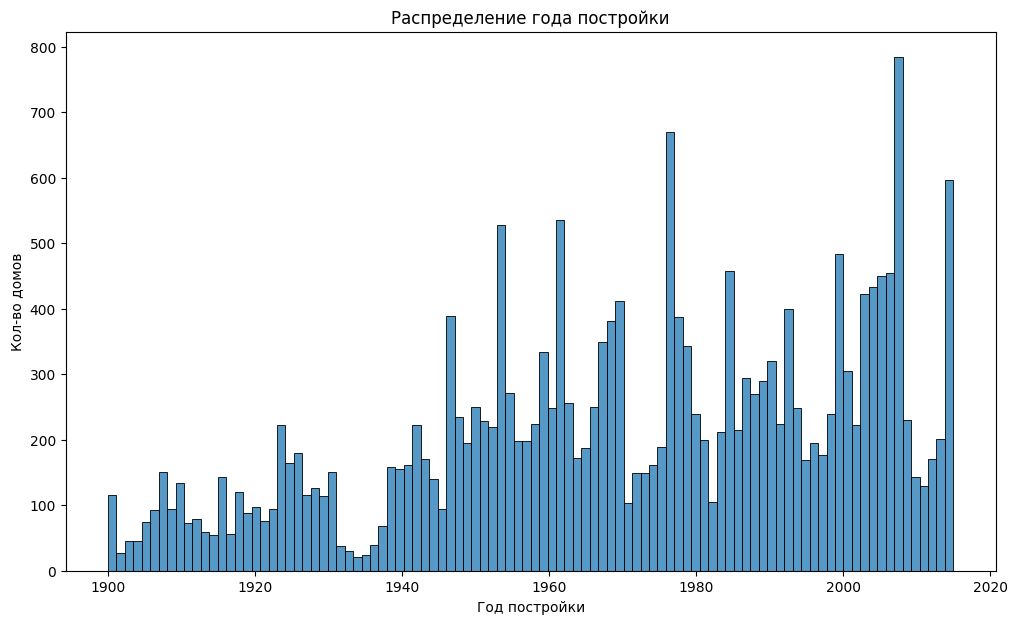

In [43]:
sns.histplot(df['yr_built'], bins=100)
plt.xlabel('Год постройки')
plt.ylabel('Кол-во домов')
plt.title('Распределение года постройки');

## Задание 2
### 2.1. Изучите распределение домов от наличия вида на набережную

In [44]:
data = df.waterfront.value_counts()

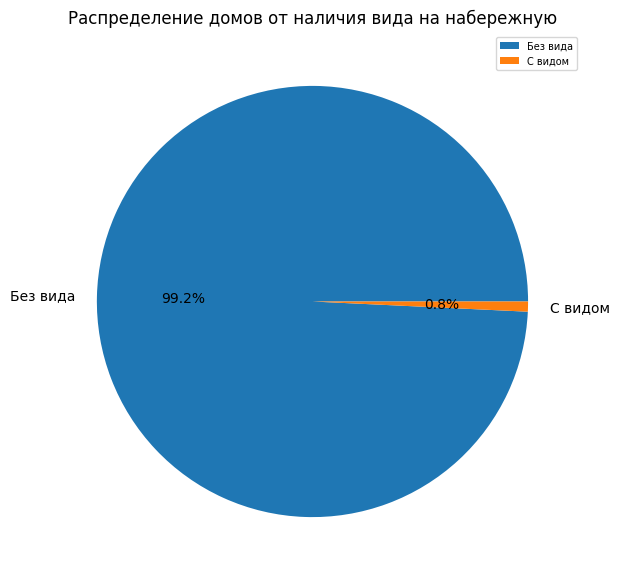

In [45]:
plt.pie(data.values, labels={'С видом', 'Без вида'}, autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(loc='upper right', fontsize=7);

### 2.2. Изучите распределение этажей домов

In [46]:
data = df.floors.value_counts()

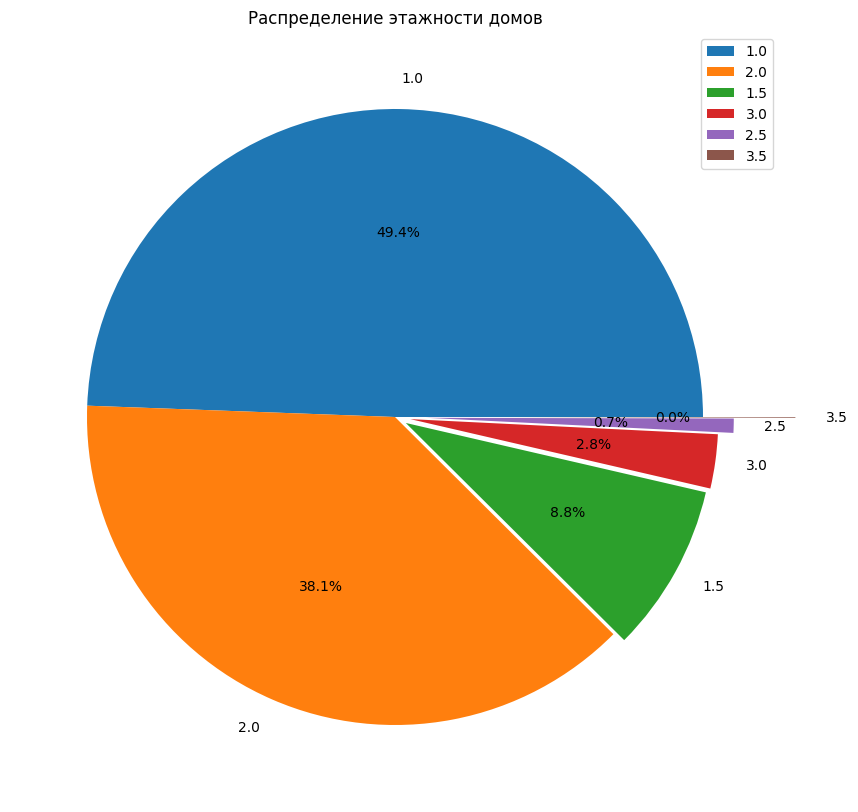

In [47]:
plt.figure(figsize=(10, 10))
expl = [0, 0, 0.04, 0.05, 0.1, 0.3]
plt.pie(data.values, autopct='%1.1f%%', labels=data.index, explode=expl)
plt.title('Распределение этажности домов')
plt.legend(data.index, loc='best');

### 2.3. Изучите распределение состояния домов

In [48]:
df.condition.value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

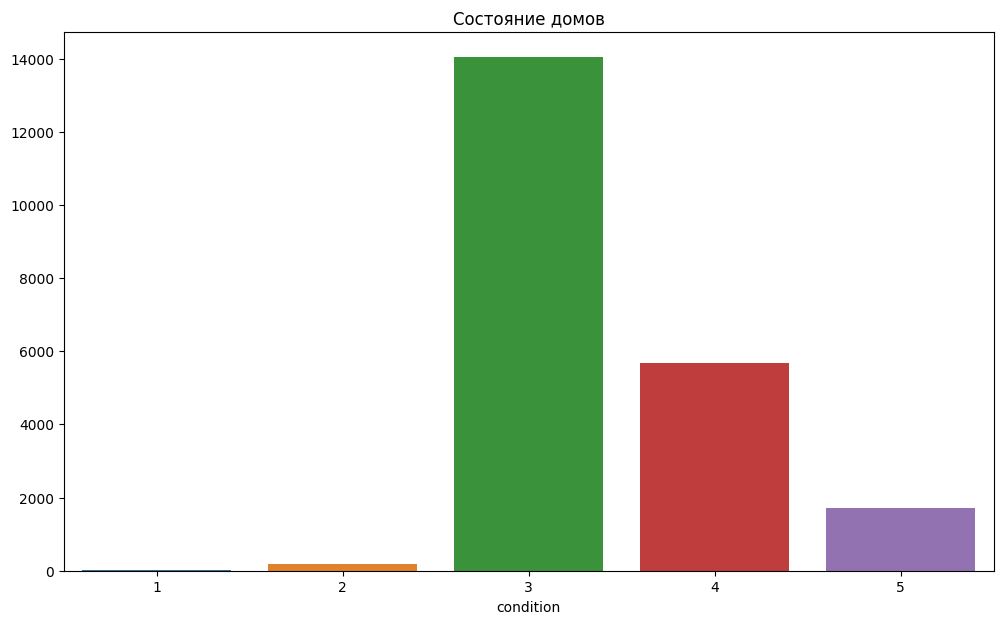

In [49]:
data = df.condition.value_counts()
       
plt.title('Состояние домов')
sns.barplot(x=data.index, y=data.values)
    
plt.show()

## Задание 3
- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### 3.1 Зависимость стоимости недвижимости от жилой площади

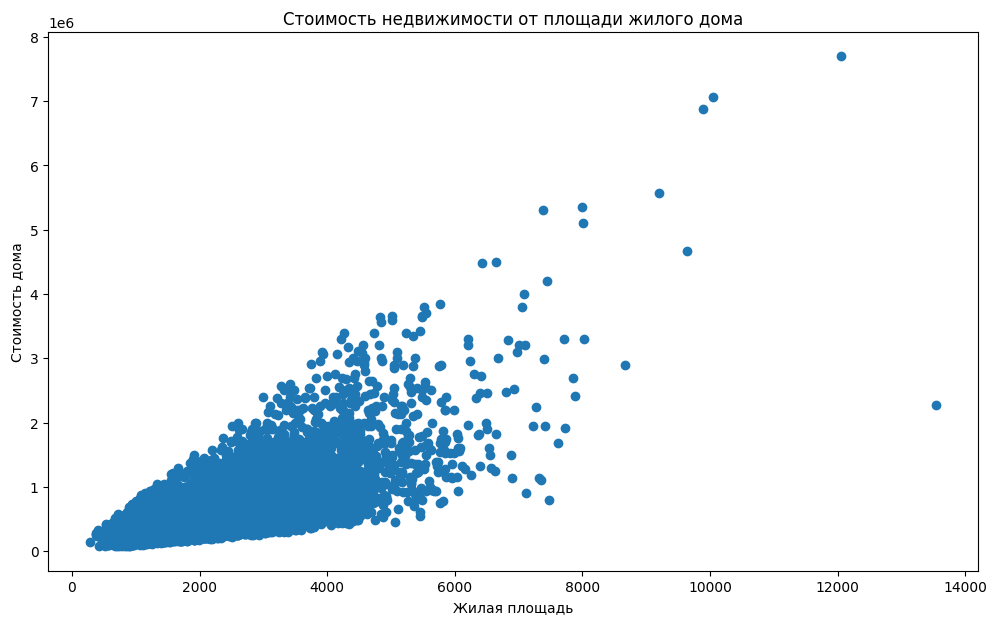

In [50]:
plt.scatter(df.sqft_living, df.price)
plt.title('Стоимость недвижимости от площади жилого дома')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость дома');

Из графика видно, что есть несколько выбросов, но очевидно, что стоимость линейно растёт с увеличением жилой площади недвижимости.

### 3.2 Зависимость стоимости недвижимости от года постройки

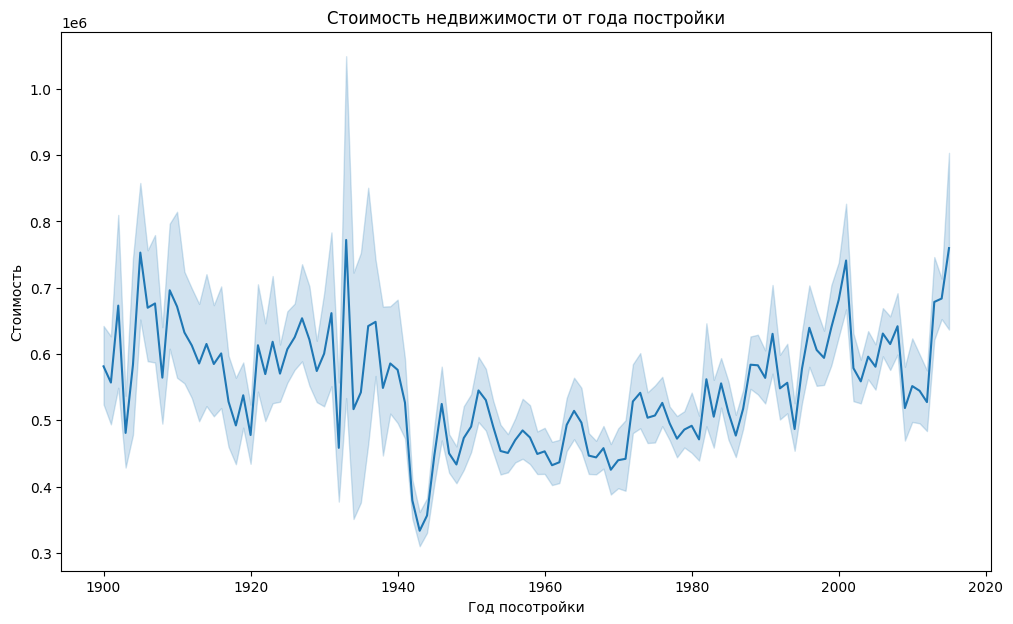

In [51]:
sns.lineplot(x=df.yr_built, y=df.price)

plt.title('Стоимость недвижимости от года постройки')
plt.xlabel('Год посотройки')
plt.ylabel('Стоимость');

После сороковых прослеживается рост стоимости домов. Что логично: чем новее здание, тем более там хорошее состояние дома. Возможно высокая стоимость домов до сорокового года объясняется их исторической ценностью, размерами и хорошим расположением.

### 3.3 Зависимость стоимости недвижимости от этажности

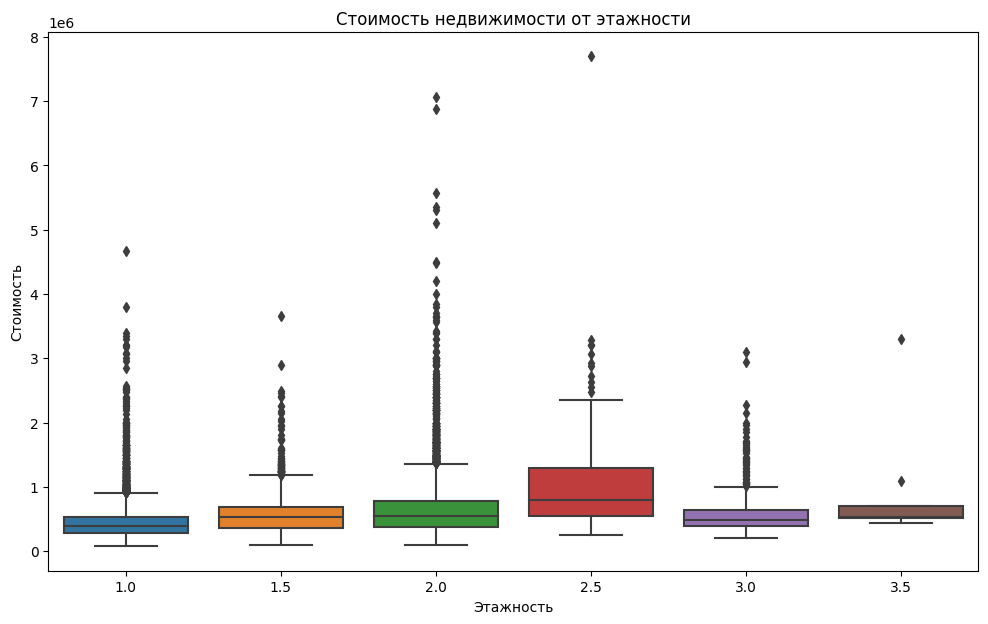

In [52]:
sns.boxplot(x=df.floors, y=df.price)
plt.xlabel('Этажность')
plt.ylabel('Стоимость')
plt.title('Стоимость недвижимости от этажности');

До 2,5 этажей рост цены идёт по нарастающей. Медианная цена у домов с 2,5 этажами самая большая и разброс цен тоже. После цены снижаются, как и количество предложений на рынке. Возможно дома такой этажности более старые и давно не ремонтировались в виду не рентабельности таких мероприятий.

### 3.4 Зависимость стоимости недвижимости от жилой площади

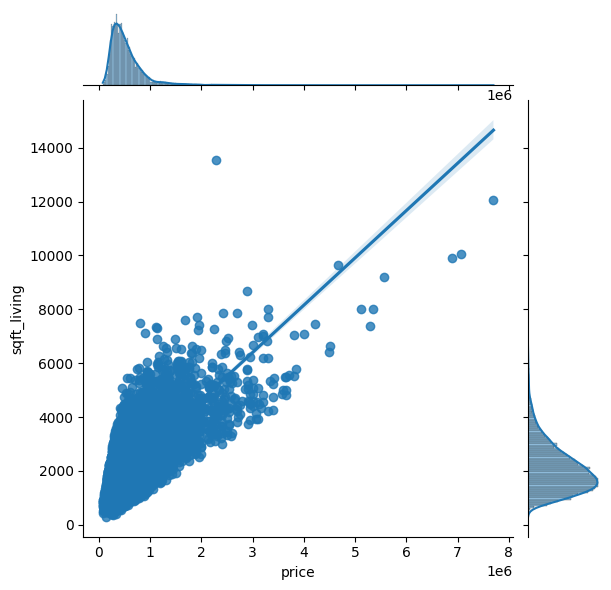

In [53]:
sns.jointplot(x=df.price, y=df.sqft_living, kind='reg');

Очевидно прямая зависимость. Плюс имеется небольшое количество выбросов, которые могут быть связаны с тем, что дома очень большой площади могут находиться в плохом состоянии.

### 3.5 Зависимость стоимости недвижимости от оценки

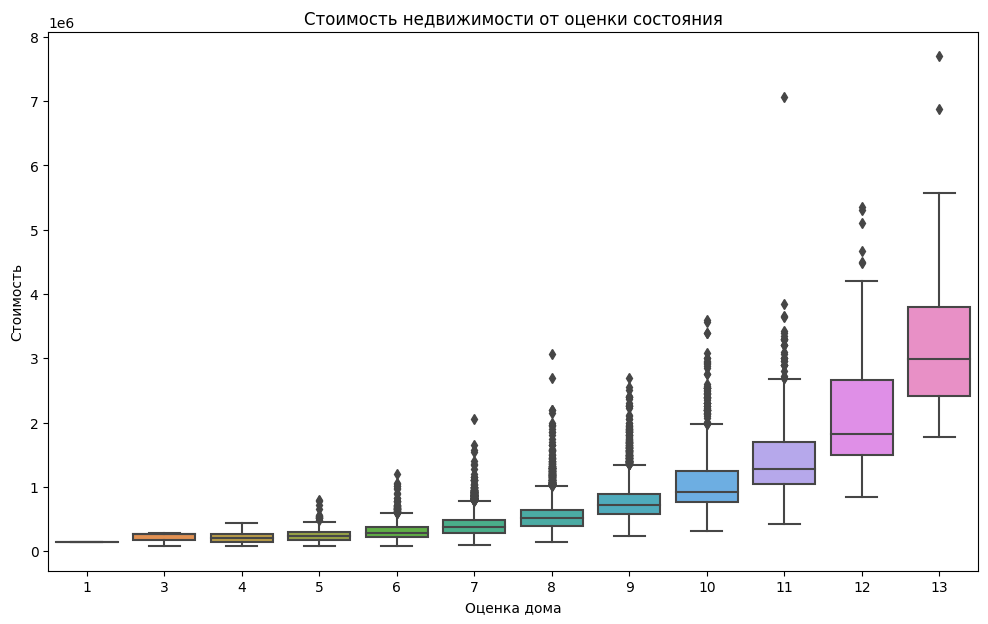

In [54]:
sns.boxplot(x=df.grade, y=df.price)
plt.xlabel('Оценка дома')
plt.ylabel('Стоимость')
plt.title('Стоимость недвижимости от оценки состояния');

Прямая зависимость от оценки состояния дома к его стоимости. Плюс наблюдается увеличение разброса цены от медианной, чем выше оценка состояния дома. Среди средних по оценке домов имеется большое количество выбросов, что может быть связано с большим количеством домов в данных категориях.